In [1]:

""" Warning : Don't forget to remove your github username and token after running this cell """
 
import pandas as pd
import requests
import io
 
# Username of your GitHub account
 
username = ''
 
# Personal Access Token (PAO) from your GitHub account
 
token = ''
 
# Creates a re-usable session object with your creds in-built
 
github_session = requests.Session()
github_session.auth = (username, token)

In [2]:
def download_data (url,country):

    url = url # Make sure the url is the raw version of the file on GitHub
    download = github_session.get(url).content

    # Reading the downloaded content and making it a pandas dataframe

    df = pd.read_csv(io.StringIO(download.decode('utf-8')))

    # Drop the Unnamed and ID column
    df = df.drop(['Unnamed: 0','ID'], axis = 1)

    #Add country column to dataframe
    df['Country']= country

    # return dataframe

    return df

In [3]:
url = "https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/output_to_clean/FL-2016-000114-EGY.csv"
df_000114_EGY = download_data(url,'Egypt')
print(df_000114_EGY.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           100 non-null    object
 1   article_title      100 non-null    object
 2   article_link       100 non-null    object
 3   article_content    97 non-null     object
 4   publishing_date    100 non-null    object
 5   article_image      98 non-null     object
 6   article_keywords   100 non-null    object
 7   article_relevance  100 non-null    object
 8   Country            100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB
None


In [4]:
url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/output_to_clean/FL-2020-000038-EGY.csv'
df_000038_EGY = download_data(url,'Egypt')
print(df_000038_EGY.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           100 non-null    object
 1   article_title      100 non-null    object
 2   article_link       100 non-null    object
 3   article_content    99 non-null     object
 4   publishing_date    100 non-null    object
 5   article_image      95 non-null     object
 6   article_keywords   100 non-null    object
 7   article_relevance  100 non-null    object
 8   Country            100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB
None


In [5]:
url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/output_to_clean/FL-2021-000021-IND.csv'
df_000021_IND = download_data(url,'India')
print(df_000021_IND.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           100 non-null    object
 1   article_title      100 non-null    object
 2   article_link       100 non-null    object
 3   article_content    94 non-null     object
 4   publishing_date    100 non-null    object
 5   article_image      96 non-null     object
 6   article_keywords   100 non-null    object
 7   article_relevance  100 non-null    object
 8   Country            100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB
None


In [6]:
url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/output_to_clean/FL-2021-000030-IDN.csv'
df_000030_IND = download_data(url,'India')
print(df_000030_IND.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           100 non-null    object
 1   article_title      100 non-null    object
 2   article_link       100 non-null    object
 3   article_content    81 non-null     object
 4   publishing_date    100 non-null    object
 5   article_image      85 non-null     object
 6   article_keywords   100 non-null    object
 7   article_relevance  100 non-null    object
 8   Country            100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB
None


In [7]:
#concatenating
df =pd.concat([df_000114_EGY, df_000038_EGY, df_000021_IND, df_000030_IND], 
                  ignore_index = True)
df.shape

(400, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           400 non-null    object
 1   article_title      400 non-null    object
 2   article_link       400 non-null    object
 3   article_content    371 non-null    object
 4   publishing_date    400 non-null    object
 5   article_image      374 non-null    object
 6   article_keywords   400 non-null    object
 7   article_relevance  400 non-null    object
 8   Country            400 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [9]:
df.tail()

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,Country
395,FL-2021-000030-IDN,The Latest: Lockdown extended for metro Manila...,https://www.ksat.com/news/politics/2021/04/04/...,Priests wearing face masks march after Easter ...,"Sun, 04 Apr 2021 07:00:00 GMT",https://www.ksat.com/resizer/dCE9XQx8bxLertnpp...,"['reported', 'confirmed', 'lockdown', 'coronav...",,India
396,FL-2021-000030-IDN,Kerala Polls: Salman Khurshid urges Keralites ...,https://www.oneindia.com/india/kerala-polls-sa...,No leadership crisis in Cong; support for Soni...,"Sun, 28 Mar 2021 07:00:00 GMT",https://www.oneindia.com/img/1200x80/2019/10/d...,"['urges', 'state', 'senior', 'trend', 'salman'...",,India
397,FL-2021-000030-IDN,VIDEO: Volleyball with dramatic volcano backgr...,https://en.mehrnews.com/news/171511/VIDEO-Voll...,"TEHRAN, Mar. 30 (MNA) – A group of Icelandic v...","Tue, 30 Mar 2021 15:31:00 GMT",https://media.mehrnews.com/d/2021/03/30/4/3730...,"['tehran', 'mna', 'video', 'dramatic', 'icelan...",,India
398,FL-2021-000030-IDN,Robot Dogs to Have Their Day — on Florida Base...,https://thediplomat.com/2021/04/robot-dogs-to-...,"Advertisement\n\nLast month, the U.S. Air Forc...","Sat, 03 Apr 2021 07:00:00 GMT",https://thediplomat.com/wp-content/uploads/202...,"['base', 'robot', 'quoted', 'day', 'security',...",,India
399,FL-2021-000030-IDN,Claims Against Cuomo: A Look At The Womens All...,https://www.news18.com/news/world/claims-again...,NEW YORK: New York Gov. Andrew Cuomo is facing...,"Tue, 30 Mar 2021 07:00:00 GMT",https://images.news18.com/ibnlive/uploads/2021...,"['women', 'kissed', 'times', 'told', 'didnt', ...",,India


In [10]:
#converting the publishing date datatype from object to datetime
for index,row in df.iterrows():
      df['publishing_date'] =  pd.to_datetime(df['publishing_date'], format='%a, %d %b %Y %H:%M:%S %Z')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   event_id           400 non-null    object             
 1   article_title      400 non-null    object             
 2   article_link       400 non-null    object             
 3   article_content    371 non-null    object             
 4   publishing_date    400 non-null    datetime64[ns, GMT]
 5   article_image      374 non-null    object             
 6   article_keywords   400 non-null    object             
 7   article_relevance  400 non-null    object             
 8   Country            400 non-null    object             
dtypes: datetime64[ns, GMT](1), object(8)
memory usage: 28.2+ KB


 The first step in processing the article title and article content is to make sure that any html tags that appear should be removed. In addition we wish to tokenize our input, that way words such as flood, flooded ,flooding are considered the same with regard to sentiment analysis.

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import re
from bs4 import BeautifulSoup

def review_to_words(review):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    
    return words

In [13]:
df_article_title = df['article_title']
df_article_content =  df['article_content']

In [14]:
words = review_to_words(df_article_title[6])
print(words)

['volcano', 'caus', 'violent', 'upris', 'cleopatra', 'egypt', 'nation', 'geograph']


In [15]:
words = review_to_words(df_article_content[121])
print(words)

['khartoum', 'reuter', 'egyptian', 'presid', 'abdel', 'fattah', 'al', 'sisi', 'call', 'saturday', 'bind', 'deal', 'summer', 'oper', 'giant', 'ethiopian', 'hydropow', 'dam', 'made', 'first', 'visit', 'neighbour', 'sudan', 'sinc', '2019', 'overthrow', 'omar', 'al', 'bashir', 'sudan', 'sovereign', 'council', 'chief', 'gener', 'abdel', 'fattah', 'al', 'burhan', 'meet', 'egyptian', 'presid', 'abdel', 'fatah', 'al', 'sisi', 'khartoum', 'sudan', 'march', '6', '2021', 'sudan', 'sovereign', 'council', 'handout', 'via', 'reuter', 'egypt', 'also', 'signal', 'support', 'sudan', 'disput', 'ethiopia', 'area', 'border', 'two', 'countri', 'recent', 'arm', 'skirmish', 'egypt', 'sudan', 'lie', 'downstream', 'grand', 'ethiopian', 'renaiss', 'dam', 'gerd', 'addi', 'ababa', 'say', 'crucial', 'econom', 'develop', 'ethiopia', 'say', 'everi', 'right', 'use', 'nile', 'water', 'long', 'exploit', 'egypt', 'start', 'fill', 'reservoir', 'behind', 'dam', 'last', 'summer', 'egypt', 'sudan', 'fail', 'secur', 'legal',

The following few lines of code plot the frequent words in each articles  using nltk.FreqDist

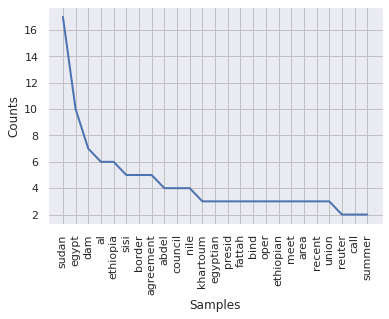

In [16]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words)
freqdist1.plot(25)

In [17]:
from nltk import FreqDist
fdist = FreqDist(words)
fdist.most_common(10)

[('sudan', 17),
 ('egypt', 10),
 ('dam', 7),
 ('al', 6),
 ('ethiopia', 6),
 ('sisi', 5),
 ('border', 5),
 ('agreement', 5),
 ('abdel', 4),
 ('council', 4)]

In [18]:
df = df.drop(['article_link','article_image','article_relevance'], axis = 1)
df.head(3)

,event_id,article_title,article_content,publishing_date,article_keywords,Country
0,FL-2016-000114-EGY,"In Egypt, 8 Dead After Chaotic Day of Heavy Ra...",CAIRO - Heavy rains that pummeled the capital ...,2019-10-23 07:00:00+00:00,"['day', 'heavy', 'flooded', 'cairos', 'egypt',...",Egypt
1,FL-2016-000114-EGY,Sirius and the Flooding of the Nile: this week...,"Every year in August, the constellation Orion ...",2019-08-26 07:00:00+00:00,"['flood', 'heliacal', 'rising', 'night', 'stor...",Egypt
2,FL-2016-000114-EGY,On climate change: 11 Egypt's governorates vul...,Vehicles submerged in the flooded New Cairo st...,2018-05-04 07:00:00+00:00,"['cairo', 'floods', 'egypt', 'report', 'water'...",Egypt


In [19]:
df = df.dropna()

In [20]:
df['article_title'] = df['article_title'].apply(review_to_words)
df['article_keywords'] = df['article_keywords'].apply(review_to_words)
df['article_content'] = df['article_content'].apply(review_to_words)

In [21]:
df.sample(10)

,event_id,article_title,article_content,publishing_date,article_keywords,Country
120,FL-2020-000038-EGY,"[egypt, reassur, citizen, current, nile, flood...","[egyptian, ministri, water, resourc, reassur, ...",2020-09-06 07:00:00+00:00,"[flood, collect, structur, egypt, water, curre...",Egypt
301,FL-2021-000030-IDN,"[plan, indonesia, provid, aid, 2700, famili, f...","[follow, day, heavi, rain, pour, sinc, friday,...",2021-04-01 07:00:00+00:00,"[famili, girl, respons, disast, karawang, indo...",India
165,FL-2020-000038-EGY,"[photo, heavi, rain, overwhelm, alexandria, sc...","[unstabl, weather, heavi, rain, thrash, alexan...",2020-11-07 08:00:00+00:00,"[vacuum, heavi, sidi, suspend, water, alexandr...",Egypt
355,FL-2021-000030-IDN,"[felicia, curri, ora, jone, billi, krishawn, s...","[directori, debut, studio, theatr, associ, art...",2021-04-02 07:00:00+00:00,"[ora, felicia, racial, star, state, studio, fl...",India
383,FL-2021-000030-IDN,"[virtual, ranger, help, south, african, reserv...","[55, 000, peopl, around, world, help, keep, ey...",2021-03-29 07:00:00+00:00,"[patrol, help, balul, wildlif, stream, south, ...",India
173,FL-2020-000038-EGY,"[south, sudan, hail, egypt, support, flood, cr...","[meet, egypt, prime, minist, mostafa, madbouli...",2020-10-26 07:00:00+00:00,"[crisi, support, flood, student, sudanes, egyp...",Egypt
52,FL-2016-000114-EGY,"[coronaviru, red, sea, governor, prepar, face,...","[red, sea, governor, ahm, abdallah, instruct, ...",2018-10-19 07:00:00+00:00,"[flood, sea, face, red, water, prepar, equip, ...",Egypt
83,FL-2016-000114-EGY,"[war, break, horn, africa, west, even, notic, ...","[articl, origin, publish, salon, com, tuesday,...",2018-01-16 08:00:00+00:00,"[war, horn, west, egypt, water, sudanes, unit,...",Egypt
339,FL-2021-000030-IDN,"[floodplain, separ, river, extens, time, chang...","[dramat, scene, flood, damag, home, infrastruc...",2021-04-04 07:00:00+00:00,"[extens, way, floodplain, human, risk, floodpl...",India
186,FL-2020-000038-EGY,"[week, disast, edg, extinct, slate]","[disast, big, peopl, affect, amid, headlin, ea...",2021-03-27 07:00:00+00:00,"[sign, kill, station, kill, garcia, disast, di...",Egypt


In [22]:
def top_ten_words(data):
    freqdist = FreqDist(data)
    #topdist = freqdist.items()
    topdist = freqdist.most_common(10)
    return topdist

In [23]:
df1 = df.copy()

In [24]:
df1['article_content'] = df1['article_content'].apply(top_ten_words)

In [25]:
df1['article_content'][121]

[('sudan', 17),
 ('egypt', 10),
 ('dam', 7),
 ('al', 6),
 ('ethiopia', 6),
 ('sisi', 5),
 ('border', 5),
 ('agreement', 5),
 ('abdel', 4),
 ('council', 4)]

In [26]:
df1.sample(10)

,event_id,article_title,article_content,publishing_date,article_keywords,Country
228,FL-2021-000021-IND,"[uttarakhand, glacier, burst, dhauliganga, wat...","[(level, 14), (water, 13), (1, 8), (flood, 7),...",2021-02-07 08:00:00+00:00,"[glacier, joshimath, dhauliganga, record, rive...",India
156,FL-2020-000038-EGY,"[nile, water, level, continu, declin, sudan, d...","[(water, 16), (nile, 13), (level, 9), (million...",2020-09-19 07:00:00+00:00,"[continu, million, flood, water, declin, level...",Egypt
235,FL-2021-000021-IND,"[breakag, hang, glacier, may, trigger, uttarak...","[(glacier, 15), (climat, 10), (chang, 10), (di...",2021-02-11 08:00:00+00:00,"[preliminari, indic, observ, glacier, chang, d...",India
190,FL-2020-000038-EGY,"[buri, 4, 000, year, ancient, cultur, could, e...","[(piec, 5), (market, 3), (site, 3), (mysteri, ...",2021-02-26 08:00:00+00:00,"[market, site, cultur, buri, locat, artefact, ...",Egypt
297,FL-2021-000021-IND,"[uttarakhand, glacier, burst, water, suppli, p...","[(water, 17), (turbid, 10), (said, 8), (delhi,...",2021-02-15 08:00:00+00:00,"[glacier, increas, hit, suppli, water, treatme...",India
317,FL-2021-000030-IDN,"[climat, chang, develop, world, drown, jakarta...","[(jakarta, 22), (flood, 14), (citi, 10), (wate...",2021-03-30 07:00:00+00:00,"[extract, sea, warm, climat, groundwat, global...",India
188,FL-2020-000038-EGY,"[eco, tip, bare, root, tree, plant, celebr, bi...","[(tree, 20), (tax, 10), (root, 9), (plant, 8),...",2021-01-23 08:00:00+00:00,"[tax, ecotip, ventura, root, birthday, root, c...",Egypt
379,FL-2021-000030-IDN,"[year, covid, 19, muddi, mission, work, feel, ...","[(church, 11), (christ, 10), (campu, 7), (said...",2021-04-02 07:00:00+00:00,"[trip, campu, ministri, kentucki, feel, missio...",India
63,FL-2016-000114-EGY,"[gerd, collaps, within, year, int, l, dam, exp...","[(dam, 12), (collaps, 10), (gerd, 7), (water, ...",2018-11-01 07:00:00+00:00,"[flood, egypt, water, ethiopia, collaps, sudan...",Egypt
330,FL-2021-000030-IDN,"[float, garden, way, keep, farm, despit, clima...","[(garden, 19), (float, 13), (chang, 10), (clim...",2021-03-31 07:00:00+00:00,"[offer, forward, famili, food, farmer, farm, h...",India


In [27]:
if 'flood' in df1['article_keywords'][121]:
  print('Flood')
elif 'flood' in df1['article_title'][121]:
  print('Flood')
elif 'flood' in df1['article_content'][121]:
  print('Flood')
else:
  print('No Flood')

No Flood


In [28]:
def classify_content(row):
    if 'flood' in row['article_keywords']:
        return "flood"
    elif 'flood' in row['article_title']:
        return "flood"
    elif 'flood' in row['article_content']:
        return 'Flood'
    else:
        return "no flood"

df1 = df1.assign(label=df1.apply(classify_content, axis=1))

df1.head()

,event_id,article_title,article_content,publishing_date,article_keywords,Country,label
0,FL-2016-000114-EGY,"[egypt, 8, dead, chaotic, day, heavi, rain, fl...","[(cairo, 13), (flood, 9), (said, 6), (citi, 6)...",2019-10-23 07:00:00+00:00,"[day, heavi, flood, cairo, egypt, includ, chao...",Egypt,flood
1,FL-2016-000114-EGY,"[siriu, flood, nile, week, storytel, night, sk...","[(siriu, 6), (flood, 6), (year, 5), (rise, 5),...",2019-08-26 07:00:00+00:00,"[flood, heliac, rise, night, storytel, star, n...",Egypt,flood
2,FL-2016-000114-EGY,"[climat, chang, 11, egypt, governor, vulner, f...","[(flood, 7), (egypt, 5), (cairo, 4), (climat, ...",2018-05-04 07:00:00+00:00,"[cairo, flood, egypt, report, water, 11, torre...",Egypt,flood
4,FL-2016-000114-EGY,"[egypt, declar, water, emerg, precaut, al, mon...","[(water, 46), (egypt, 15), (flow, 11), (dam, 1...",2019-08-14 07:00:00+00:00,"[meter, precaut, egypt, water, ethiopia, emerg...",Egypt,no flood
5,FL-2016-000114-EGY,"[8, dead, egypt, chaotic, day, heavi, rain, fl...","[(cairo, 12), (flood, 9), (said, 8), (citi, 6)...",2019-10-24 07:00:00+00:00,"[day, heavi, flood, egypt, includ, chaotic, me...",Egypt,flood
